
# Life cycle of Machine learning Project
### Understanding the Problem Statement
### Data Collection
### Data Checks to perform
### Exploratory data analysis
### Data Pre-Processing
### Model Training
## Choose best model



## 1) Problem statement
#### This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.



## 2) Data Collection
#### Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977 . The data consists of 8 column and 1000 rows.


### 2.1 Import Data and Required Packages
### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.


In [46]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Import CSV Data as Pandas Dataframe

In [47]:
df=pd.read_csv('data/stud.csv')

In [48]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [49]:
df.shape

(1000, 8)

In [50]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [51]:
df.duplicated().sum()  

np.int64(0)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Checking the number of unique values of each column

In [53]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5 Check statistics of data set

In [54]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [55]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Categories 
### Insight
* From above description of numerical data, all means are very close to each other - between 66 and 68.05;
* All standard deviations are also close - between 14.6 and 15.19;
* While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

In [56]:
print("Categories in 'gender variable:  ",end="")
print(df['gender'].unique())

print("Categories in 'race_ethnicity variable:  ",end="")
print(df['race_ethnicity'].unique())

print("Categories in 'parental_level_of_education variable:  ",end="")
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch variable:  ",end="")
print(df['lunch'].unique())

print("Categories in 'test_preparation_course variable:  ",end="")
print(df['test_preparation_course'].unique())


Categories in 'gender variable:  ['female' 'male']
Categories in 'race_ethnicity variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch variable:  ['standard' 'free/reduced']
Categories in 'test_preparation_course variable:  ['none' 'completed']


In [57]:
# define numerical & categorical variables
numerical_vars = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_vars = [feature for feature in df.columns if df[feature].dtype == 'O']
                    
print ('We have {} Numerical variables: {}'.format(len(numerical_vars),numerical_vars))
print ('\nWe have {} Categorical variables: {}'.format(len(categorical_vars),categorical_vars))


We have 3 Numerical variables: ['math_score', 'reading_score', 'writing_score']

We have 5 Categorical variables: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [58]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


3.8 Adding coloumns for "Total Score" and "Average"

In [59]:
score_columns = [col for col in df.columns if col.endswith('_score')]

if 'total_score' not in df.columns and 'average' not in df.columns:
    df['total_score'] = df[score_columns].sum(axis=1)
    df['average'] = df[score_columns].mean(axis=1)
else:
    print("Columns 'total_score' and 'average' already exist.")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [68]:
score_columns = [col for col in df.columns if col.endswith('_score') and col != 'total_score']

print("\nStudents with full marks (100): ")
for col in score_columns:
    full_marks = df[df[col] == 100]['average'].count()
    subject=col.replace('_score','').capitalize()
    print(f'Number of students with full marks in {subject}: {full_marks}')

print("\nStudents with marks Less than and Equal t0 20 : ")
for col in score_columns:
    less_than_20 = df[df[col] <= 20]['average'].count()
    subject=col.replace('_score','').capitalize()
    print(f'Students with marks Less than 20 marks in {subject}: {less_than_20}')




Students with full marks (100): 
Number of students with full marks in Math: 7
Number of students with full marks in Reading: 17
Number of students with full marks in Writing: 14

Students with marks Less than and Equal t0 20 : 
Students with marks Less than 20 marks in Math: 4
Students with marks Less than 20 marks in Reading: 1
Students with marks Less than 20 marks in Writing: 3


### Insights
* From above values we get students have performed the worst in Maths
* Best performance is in reading section

## 4. Exploring Data ( Visualization )

### 4.1 Visualize average score distribution to make some conclusion.
* Histogram
* Kernel Distribution Function (KDE)
### 4.1.1 Histogram & KDE

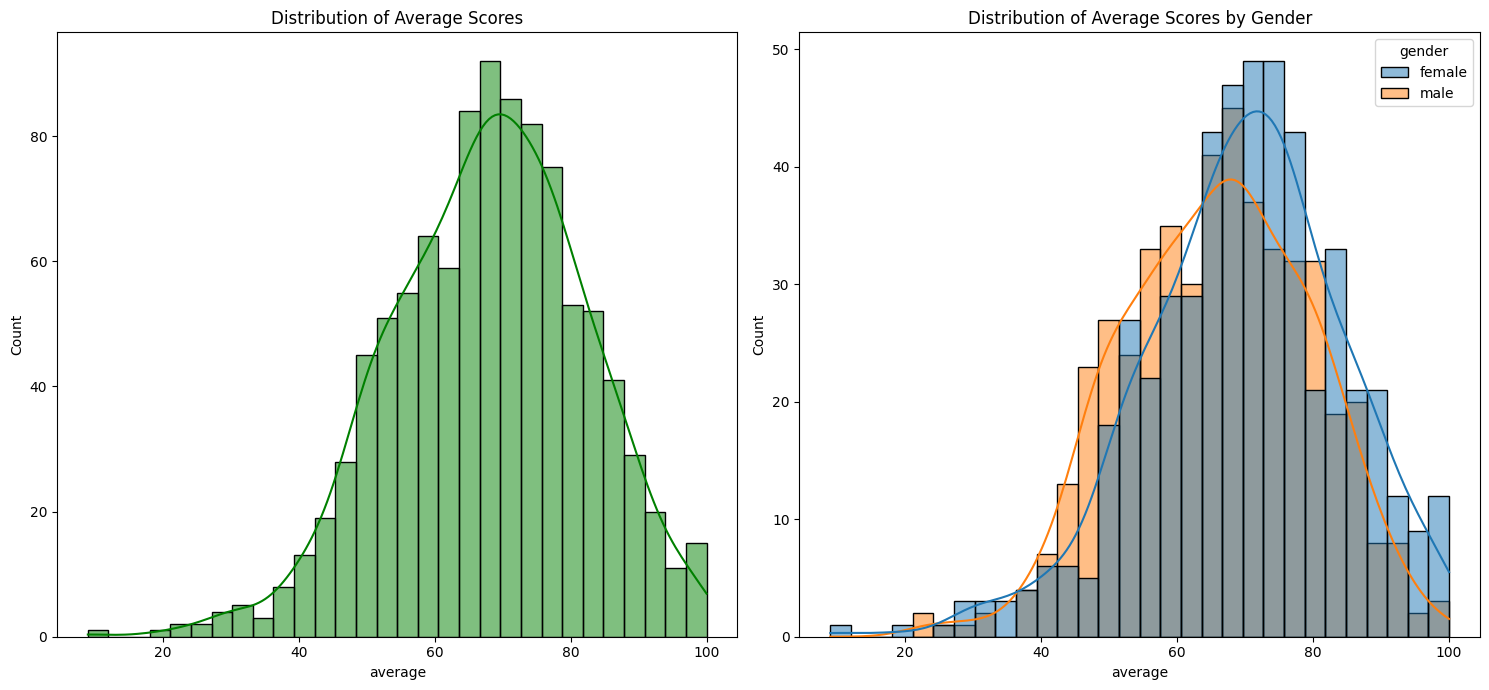

In [74]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# First subplot
sns.histplot(data=df, x='average', bins=30, kde=True, color='g', ax=axs[0])
axs[0].set_title('Distribution of Average Scores')

# Second subplot
sns.histplot(data=df, x='average', bins=30, kde=True, hue='gender', ax=axs[1])
axs[1].set_title('Distribution of Average Scores by Gender')

plt.tight_layout()
plt.show()


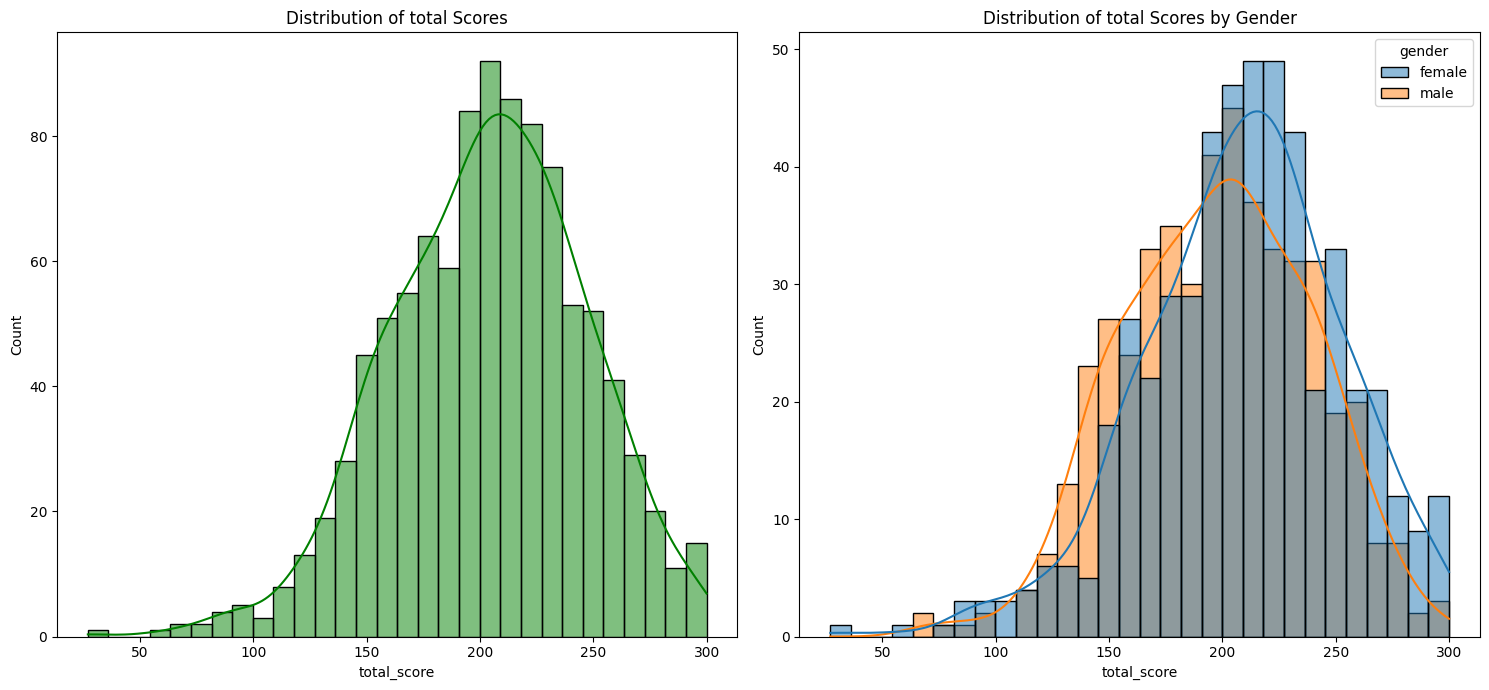

In [76]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# First subplot
sns.histplot(data=df, x='total_score', bins=30, kde=True, color='g', ax=axs[0])
axs[0].set_title('Distribution of total Scores')

# Second subplot
sns.histplot(data=df, x='total_score', bins=30, kde=True, hue='gender', ax=axs[1])
axs[1].set_title('Distribution of total Scores by Gender')

plt.tight_layout()
plt.show()



### Insights
* Female students tend to perform well then male students.

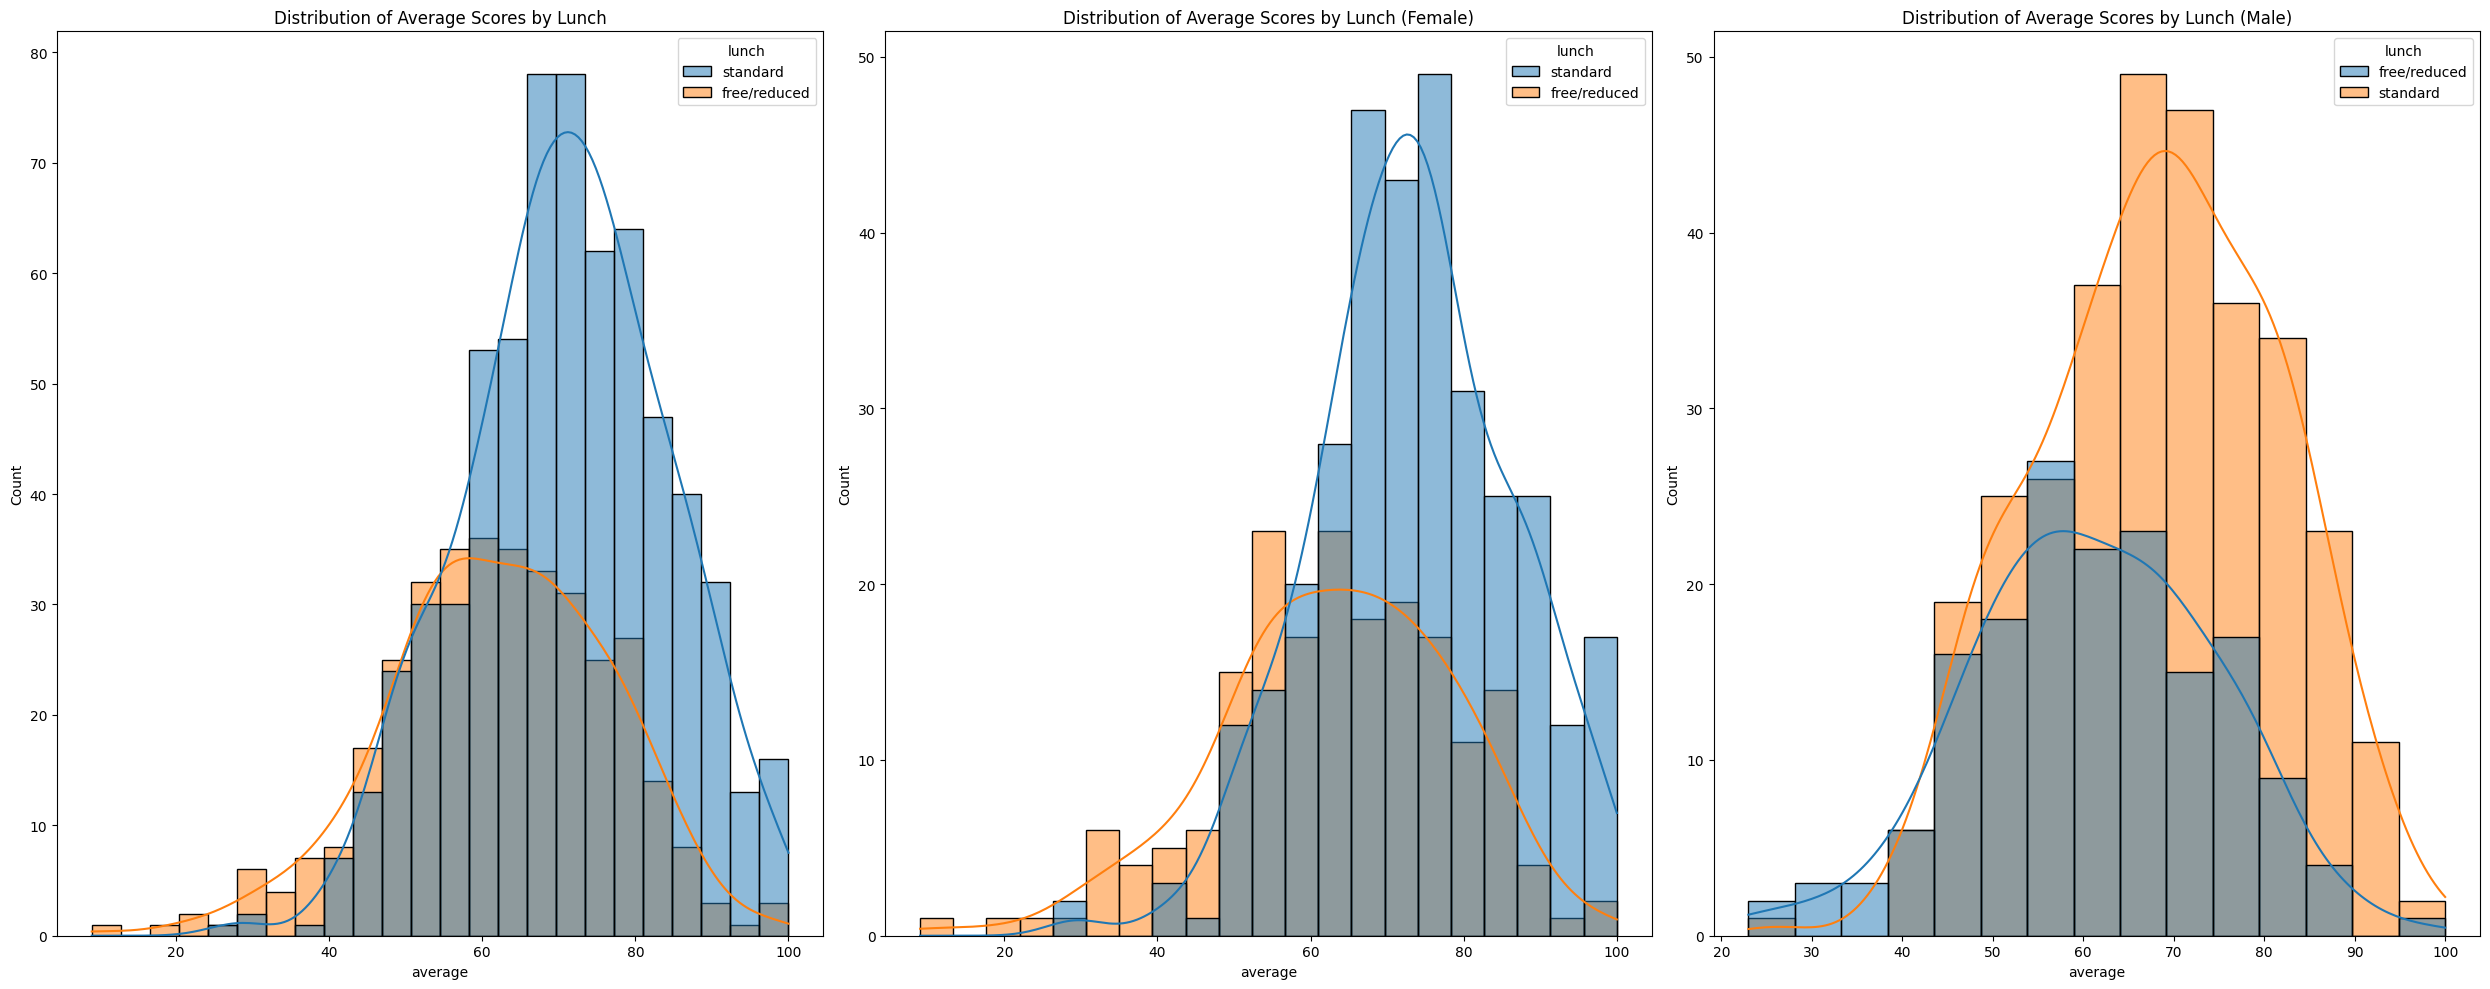

In [84]:
fig, axs = plt.subplots(1, 3, figsize=(25,10))
sns.histplot(data=df,x='average',kde=True,hue='lunch',ax=axs[0])
axs[0].set_title('Distribution of Average Scores by Lunch')

sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch',ax=axs[1])
axs[1].set_title('Distribution of Average Scores by Lunch (Female)')

sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch',ax=axs[2])
axs[2].set_title('Distribution of Average Scores by Lunch (Male)')

plt.tight_layout()
plt.show()

### Insights
* Standard lunch helps perform well in exams.
* Standard lunch helps perform well in exams be it a male or a female.

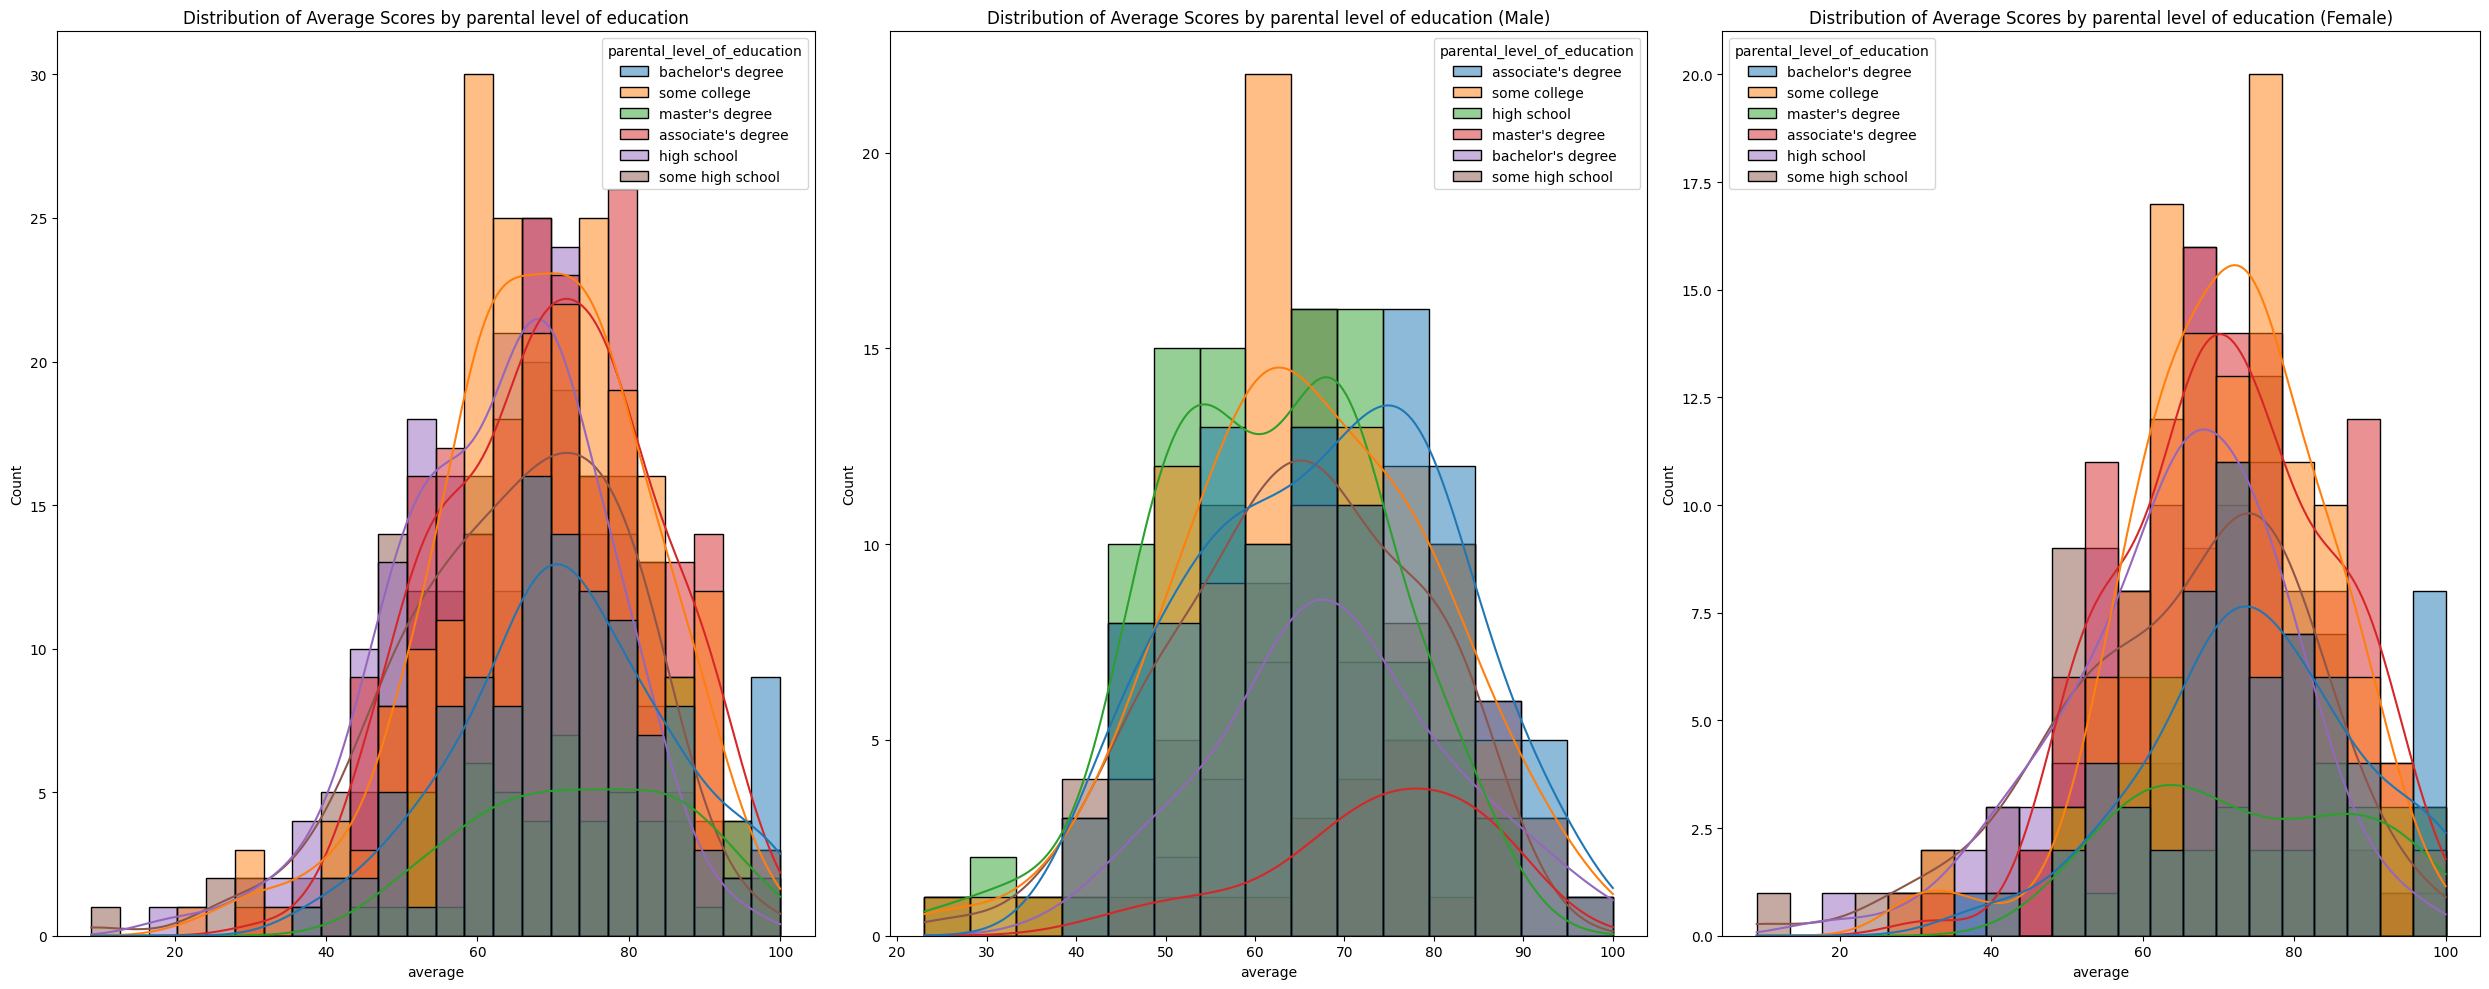

In [89]:
fig, axs = plt.subplots(1, 3, figsize=(25,10))
sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education',ax=axs[0])
axs[0].set_title('Distribution of Average Scores by parental level of education')

sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education',ax=axs[1])
axs[1].set_title('Distribution of Average Scores by parental level of education (Male)')

sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education',ax=axs[2])
axs[2].set_title('Distribution of Average Scores by parental level of education (Female)')

plt.tight_layout()
plt.show()

### Insights
* In general parent's education don't help student perform well in exam.
* 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
* 3rd plot we can see there is no effect of parent's education on female students.

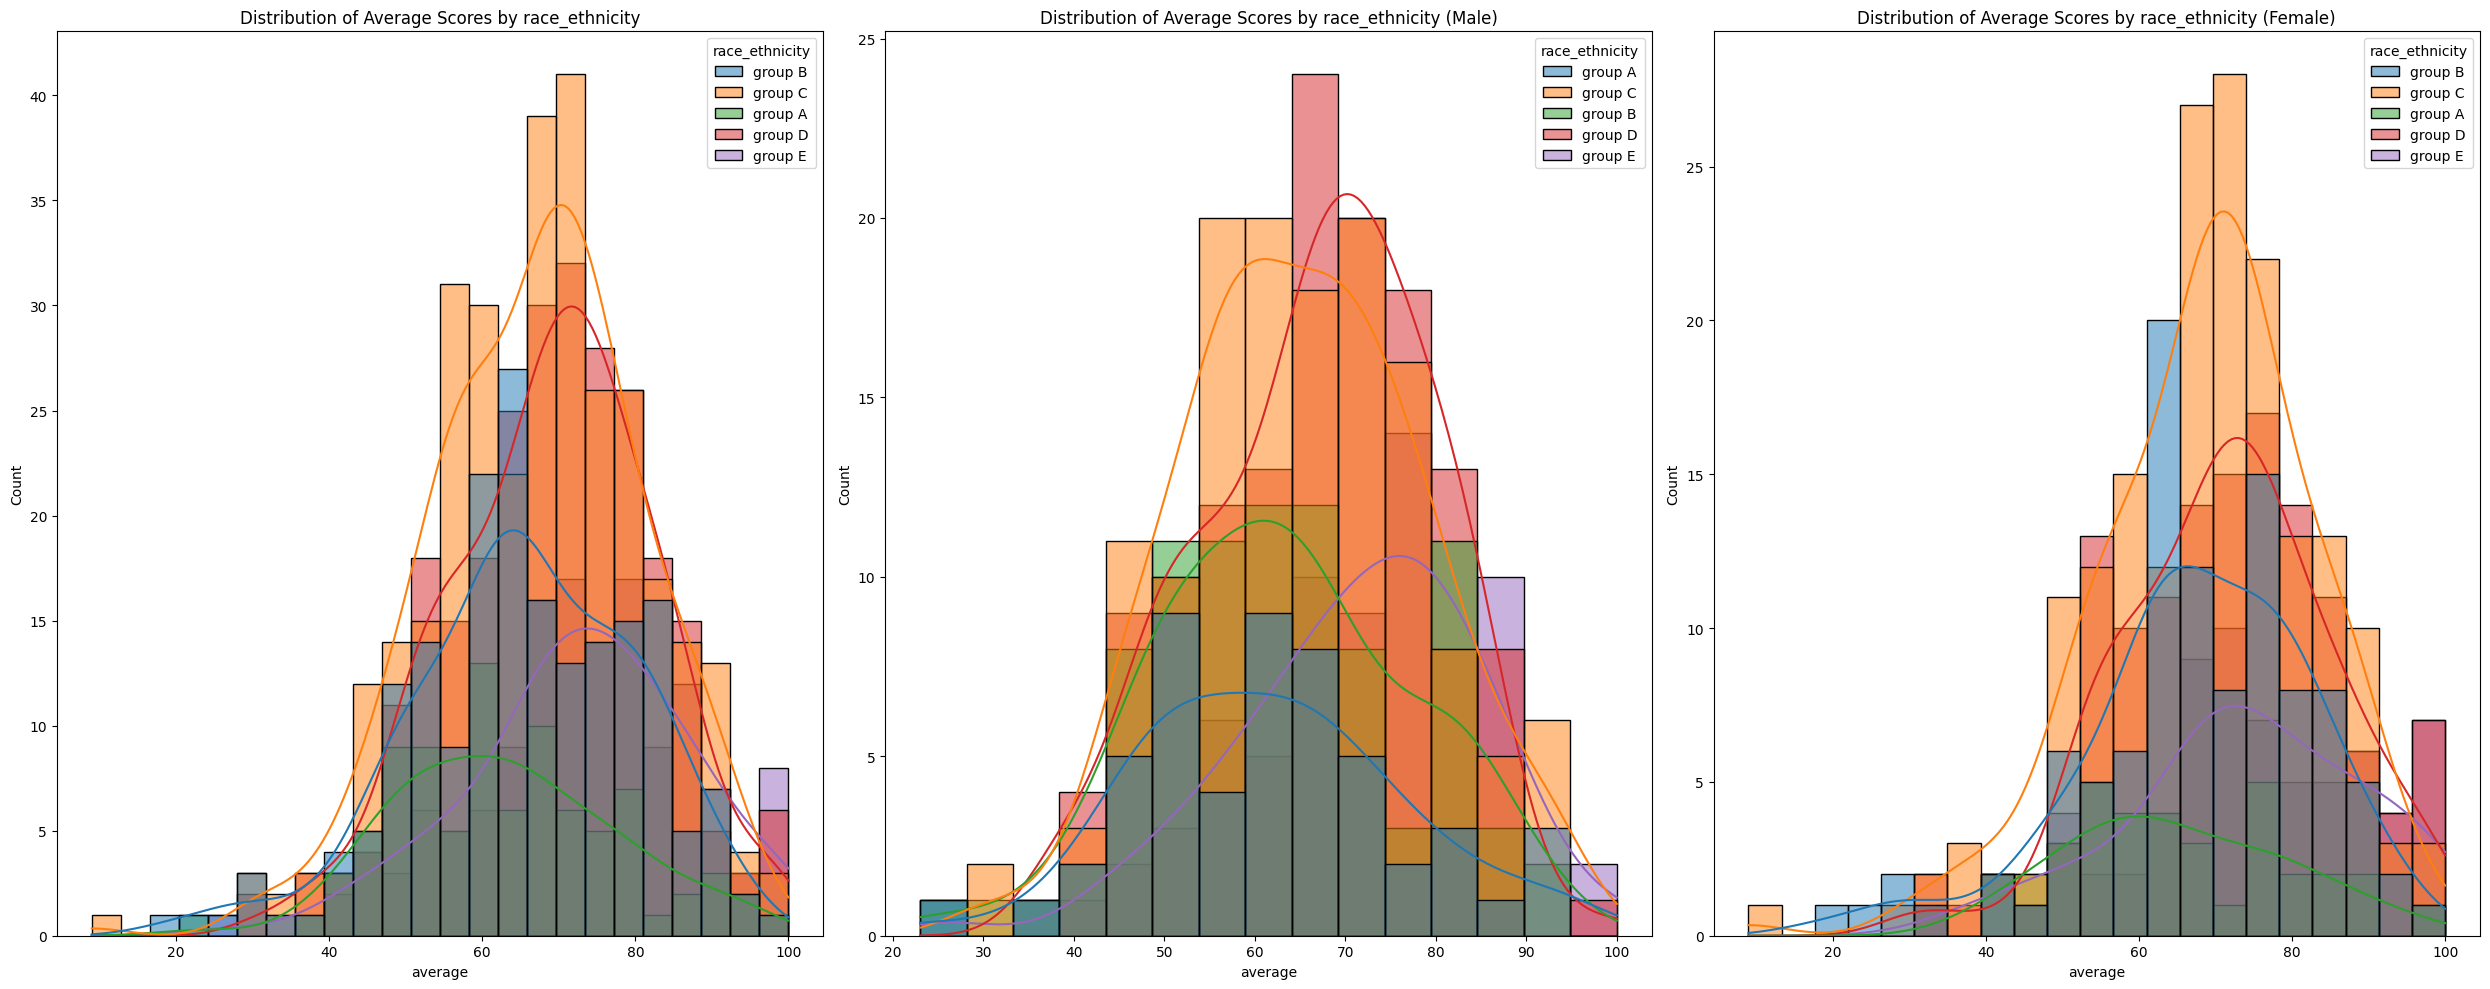

In [90]:
fig, axs = plt.subplots(1, 3, figsize=(25,10))
sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity',ax=axs[0])
axs[0].set_title('Distribution of Average Scores by race_ethnicity')

sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity',ax=axs[1])
axs[1].set_title('Distribution of Average Scores by race_ethnicity (Male)')

sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity',ax=axs[2])
axs[2].set_title('Distribution of Average Scores by race_ethnicity (Female)')

plt.tight_layout()
plt.show()

### Insights
* Students of group A and group B tends to perform poorly in exam.
* Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

###  4.2 Maximumum score of students in all three subjects

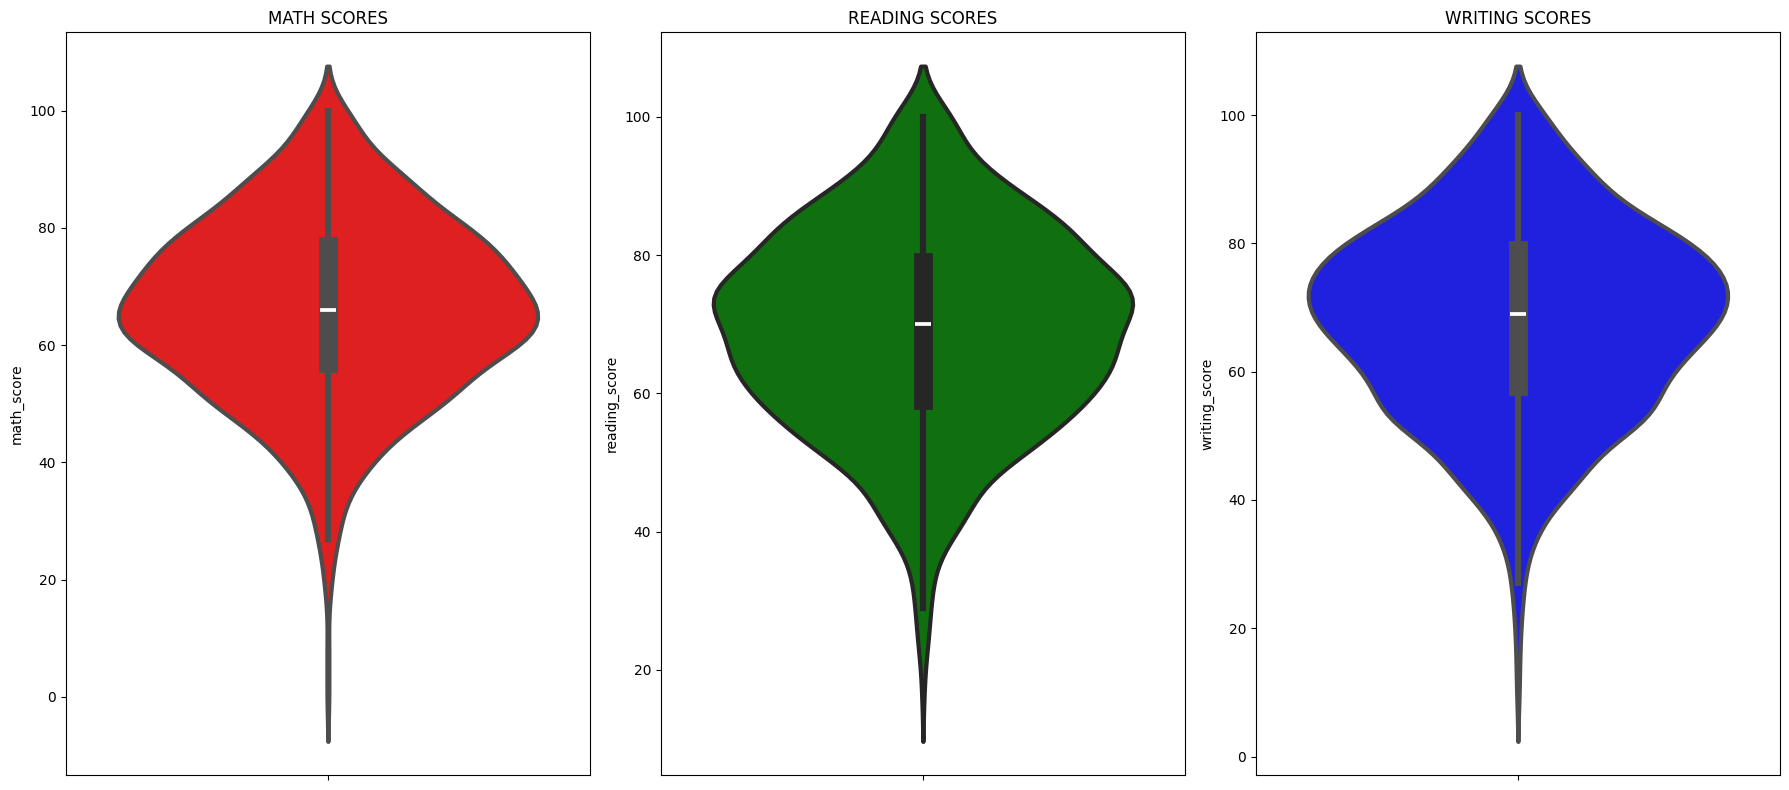

In [98]:
fig, axs = plt.subplots(1, 3, figsize=(18, 8))

sns.violinplot(y='math_score', data=df, color='red', linewidth=3, ax=axs[0])
axs[0].set_title('MATH SCORES')

sns.violinplot(y='reading_score', data=df, color='green', linewidth=3, ax=axs[1])
axs[1].set_title('READING SCORES')

sns.violinplot(y='writing_score', data=df, color='blue', linewidth=3, ax=axs[2])
axs[2].set_title('WRITING SCORES')

plt.tight_layout()
plt.show()

### Insights
* From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80


### 4.3 Multivariate analysis using pieplot

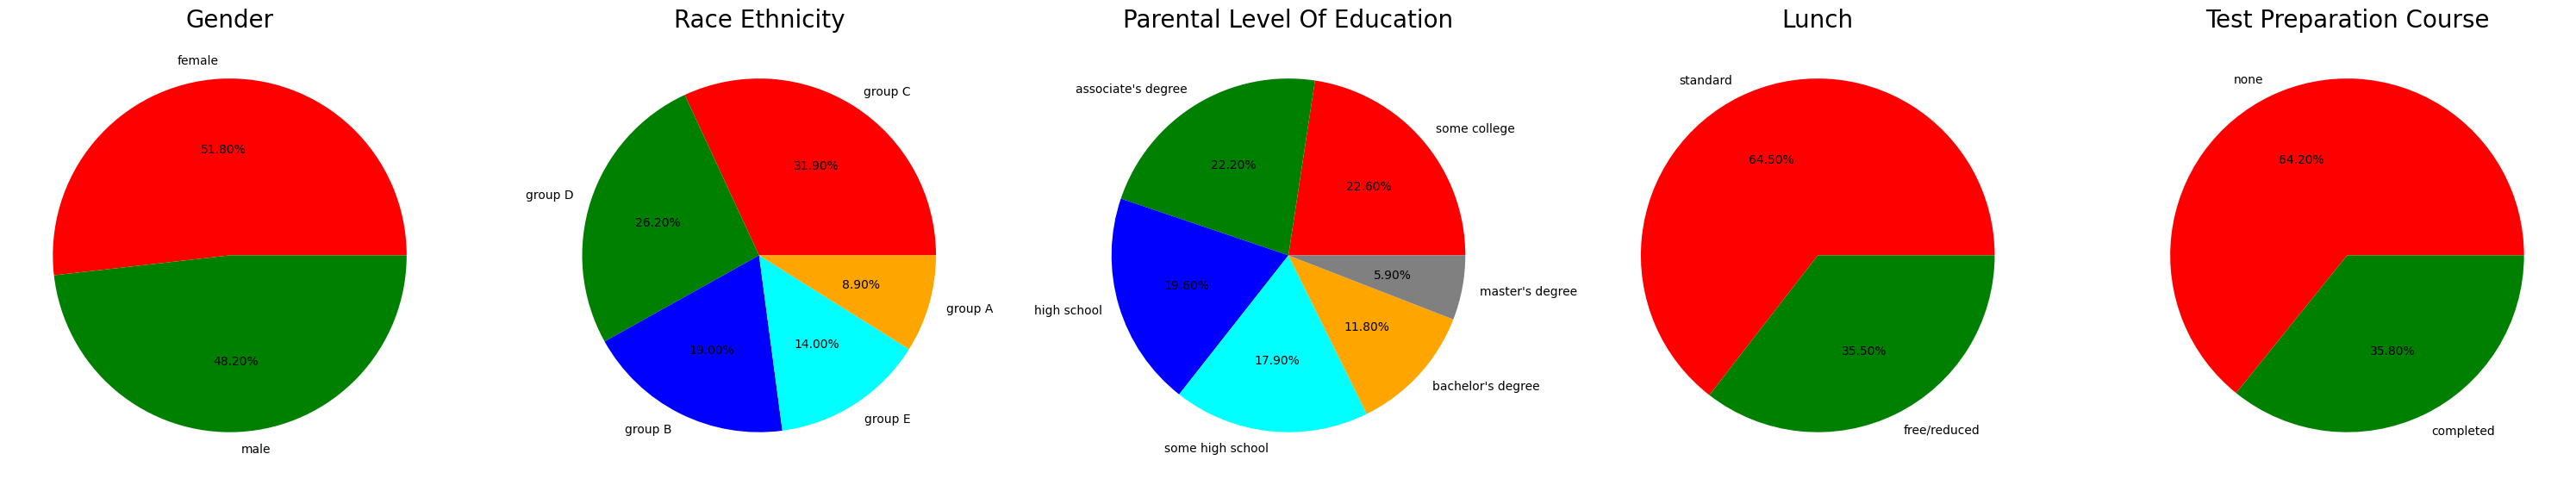

In [102]:
plt.rcParams['figure.figsize'] = (30, 12)

categorical_cols = df.select_dtypes(include=['object', 'category']).columns

colors = ['red', 'green', 'blue', 'cyan', 'orange', 'grey', 'purple', 'yellow']

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(1, len(categorical_cols), i)
    size = df[col].value_counts()
    plt.pie(size, labels=size.index, autopct='%.2f%%', colors=colors[:len(size)])
    plt.title(col.replace('_', ' ').title(), fontsize=20)
    plt.axis('off')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()
